In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
plt.ion()

import sys
sys.path.append('../../')

import logomaker

In [2]:
# Load CRP binding site sequences
with open('../data/crp_sites.fasta','r') as f:
    seqs = [l.strip() for l in f.readlines() if '>' not in l and len(l.strip())>0]
    
# Preview sequences
print('There are %d sequences, all of length %d'%(len(seqs), len(seqs[0])))
seqs[:10]

There are 358 sequences, all of length 26


['ATAAGCAGGATTTAGCTCACACTTAT',
 'AAAAATGTGATACCAATCACAGAATA',
 'ATATTGGTGATCCATAAAACAATATT',
 'ATATTGGTGAGGAACTTAACAATATT',
 'GATTATTTGCACGGCGTCACACTTTG',
 'CAAAGTGTGACGCCGTGCAAATAATC',
 'CTTTCTTCGTAACGCCTCGCAAATTT',
 'TTATATGTGGTGCTAATACCCGGTTC',
 'GAACCGGGTATTAGCACCACATATAA',
 'AGAAGTTTGAATTGTTACAAAAAGAC']

In [3]:
# Create background
gc = .51
background = [(1-gc)/2, gc/2, gc/2, (1-gc)/2]

In [ ]:
# Background matrix

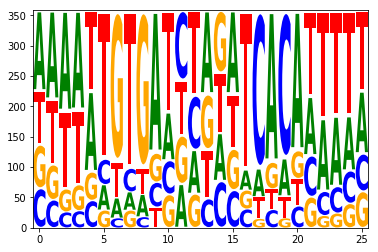

In [4]:
# Alignment -> Counts matrix
counts_mat = logomaker.alignment_to_counts_mat(seqs)
counts_mat.head()

logo = logomaker.Logo(counts_mat)

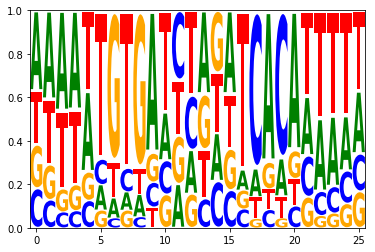

In [5]:
# Normalize counts
normalized_mat = logomaker.normalize_matrix(counts_mat)
logomaker.Logo(normalized_mat)

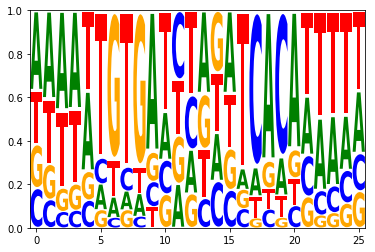

In [6]:
# Counts matrix -> Probability matrix
prob_mat = logomaker.transform_matrix(counts_mat, 
                                      from_type='counts', 
                                      to_type='probability')
logomaker.Logo(prob_mat)

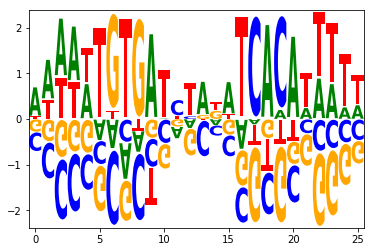

In [7]:
# Counts matrix -> Weight matrix
weight_mat = logomaker.transform_matrix(counts_mat, 
                                        background=background,
                                        from_type='counts', 
                                        to_type='weight')
logomaker.Logo(weight_mat, center=True)

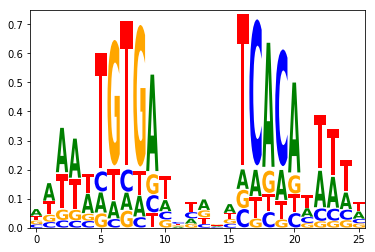

In [8]:
# Counts matrix -> Information matrix
info_mat = logomaker.transform_matrix(counts_mat, 
                                     background=background,
                                     from_type='counts', 
                                     to_type='information') 
logomaker.Logo(info_mat)

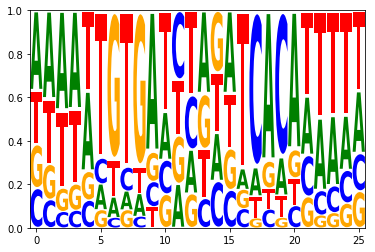

In [9]:
# Information matrix -> Probability matrix
prob_mat_2 = logomaker.transform_matrix(info_mat, 
                                        background=background,
                                        from_type='information', 
                                        to_type='probability')
logomaker.Logo(prob_mat_2)

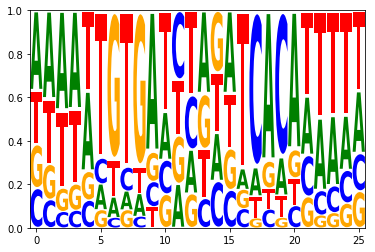

In [10]:
# Weight matrix -> Probability matrix
prob_mat_3 = logomaker.transform_matrix(weight_mat, 
                                        background=background,
                                        from_type='weight', 
                                        to_type='probability')
logomaker.Logo(prob_mat_3)

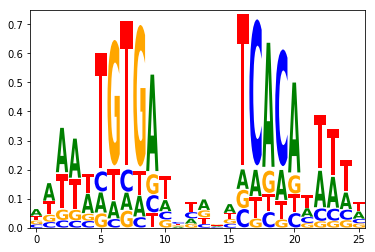

In [11]:
# Weight matrix -> Information matrix
info_mat_2 = logomaker.transform_matrix(weight_mat, 
                                        background=background,
                                        from_type='weight', 
                                        to_type='information')
logomaker.Logo(info_mat_2)

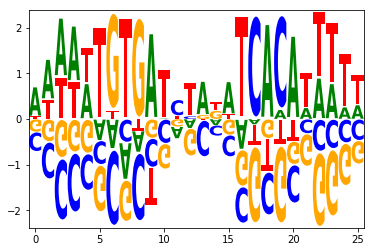

In [12]:
# Information matrix -> Weight matrix
weight_mat_2 = logomaker.transform_matrix(info_mat, 
                                          background=background,
                                          from_type='information', 
                                          to_type='weight')
logomaker.Logo(weight_mat_2, center=True)

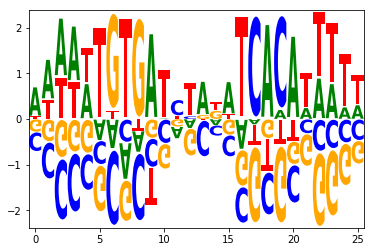

In [13]:
# Center matrix
centered_mat = logomaker.center_matrix(weight_mat)
logomaker.Logo(centered_mat)